In [54]:
import pandas as pd
import numpy as np

In [55]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"Stable Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Stable Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Stable Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Stable Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Stable Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Stable Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [56]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"Chaos Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Chaos Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Chaos Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Chaos Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Chaos Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Chaos Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [57]:
time_ax = np.linspace(1/256, 1/256*(chaos_alt_law_eval.shape[0]),chaos_alt_law_eval.shape[0])

In [58]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [59]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [60]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).iloc[1:, :].sort_index(axis=1).set_index(time_ax)

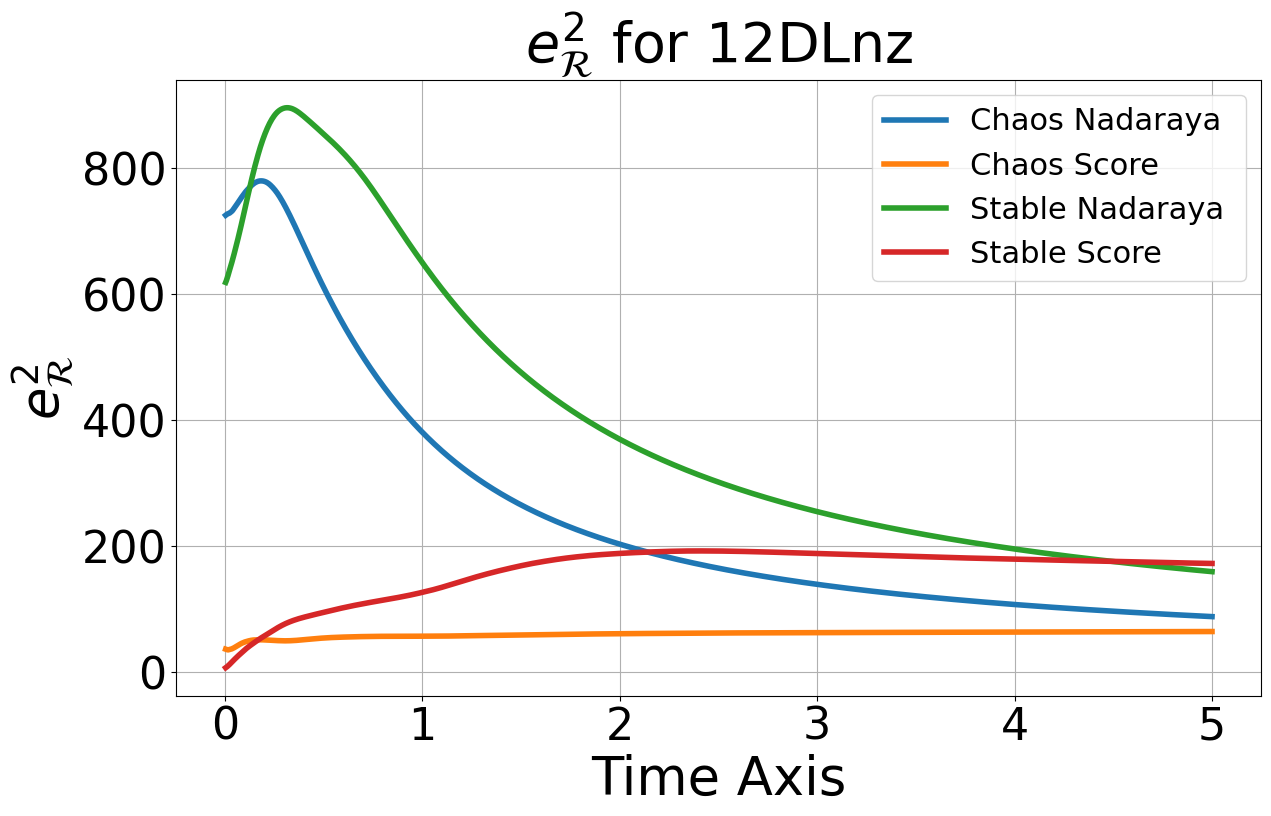

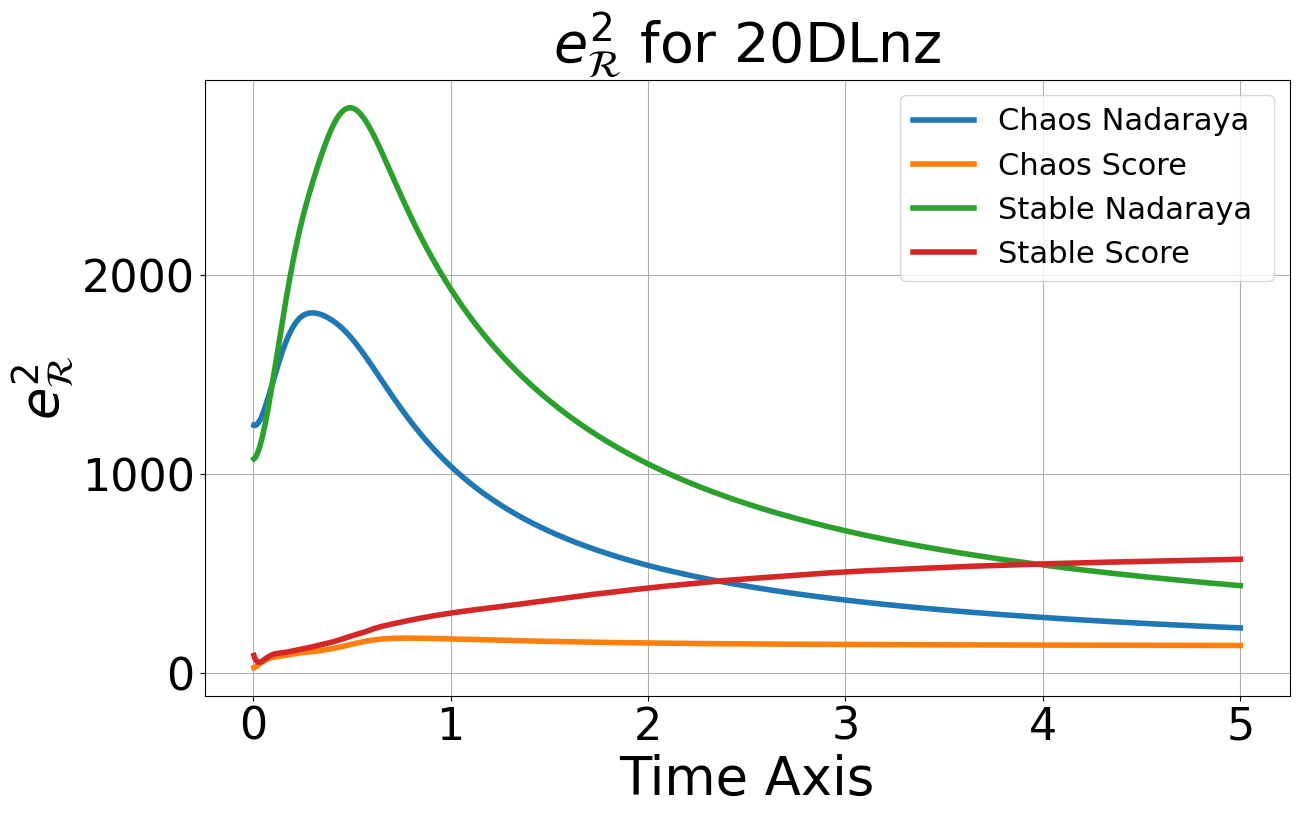

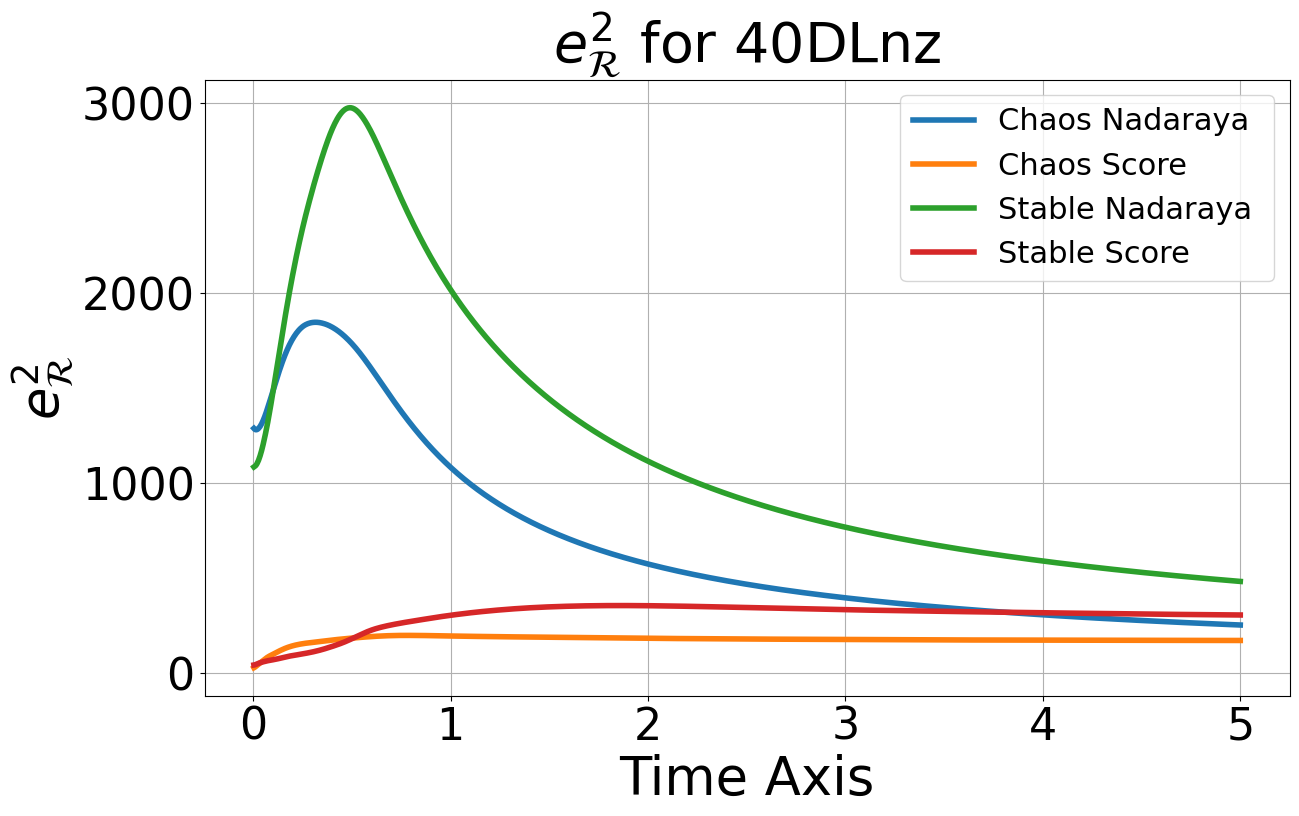

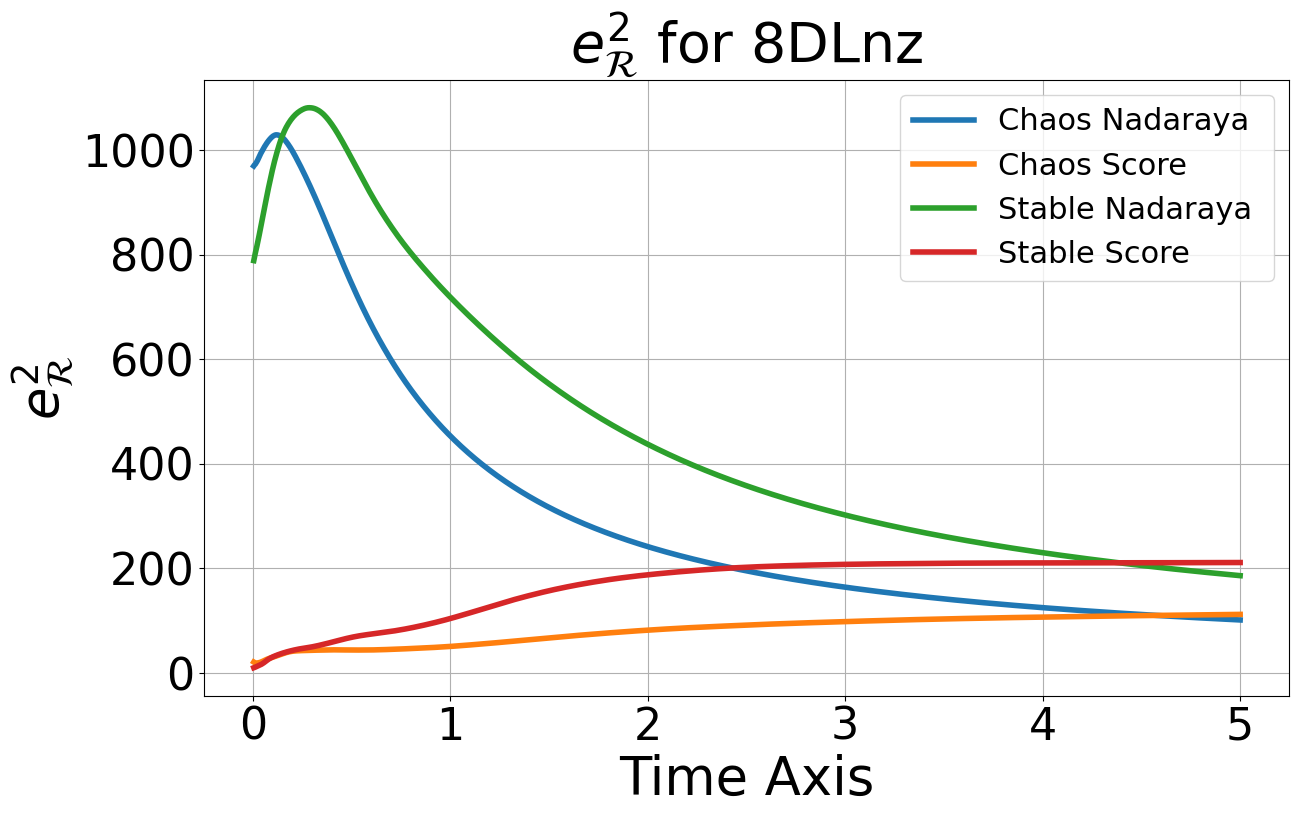

In [61]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = true_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$e^{{2}}_{{\mathcal{{R}}}}$ for {true_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$e^{{2}}_{{\mathcal{{R}}}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.grid(True)
    plt.show()
    plt.close()

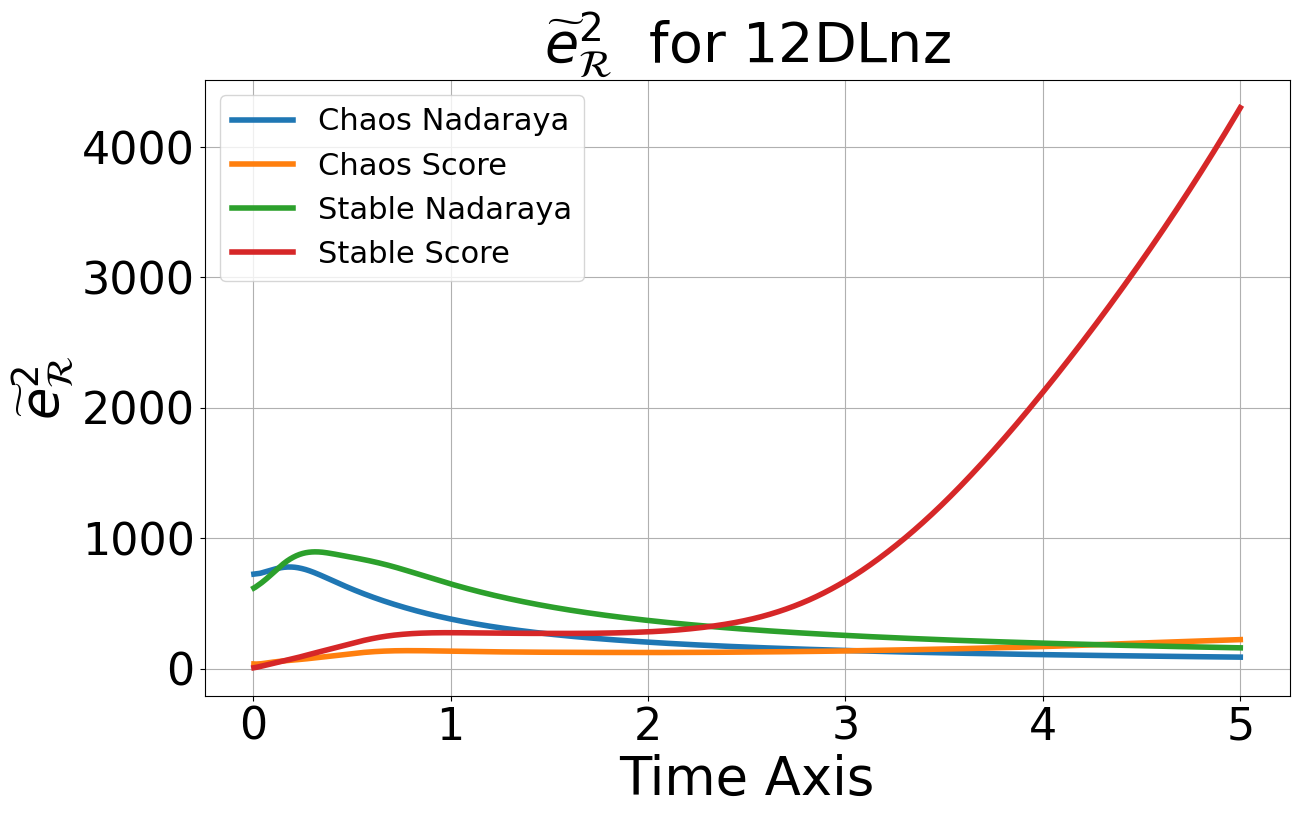

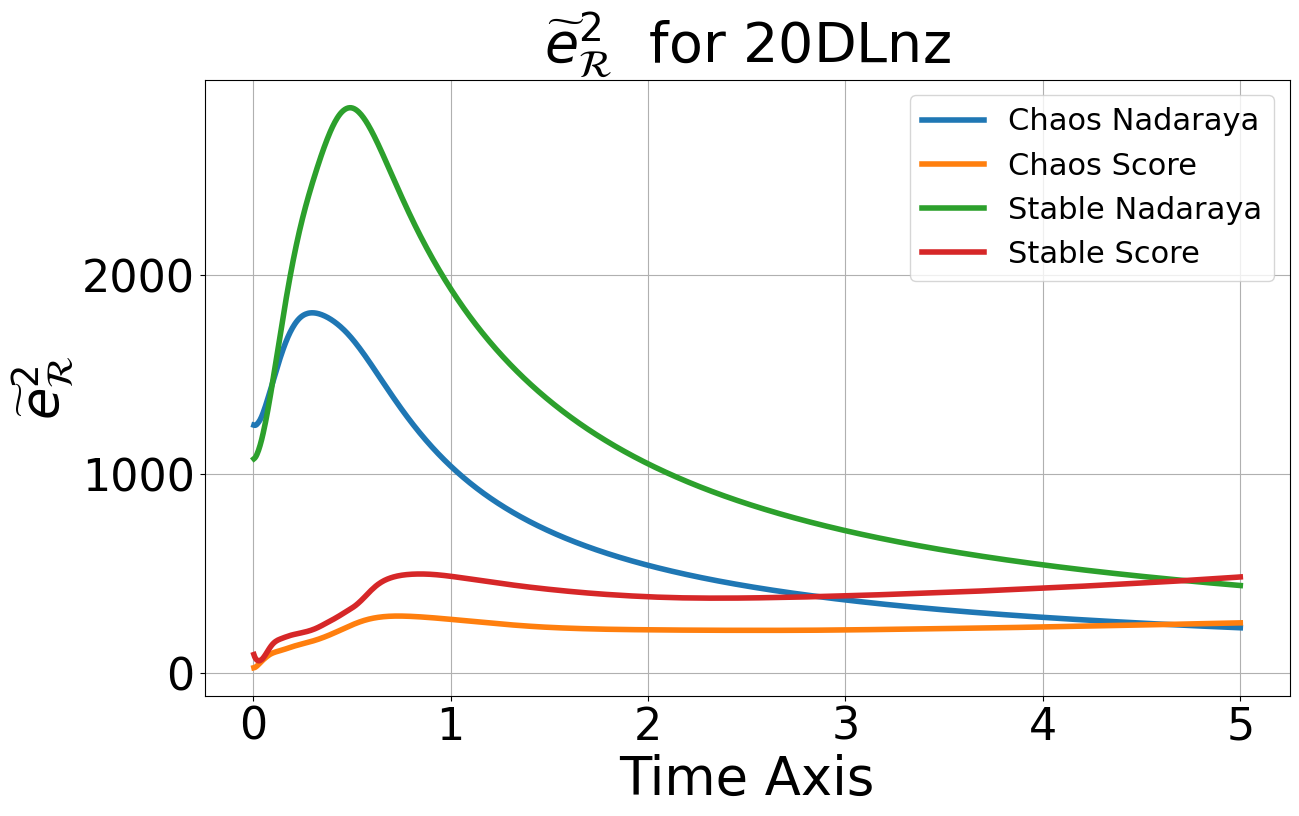

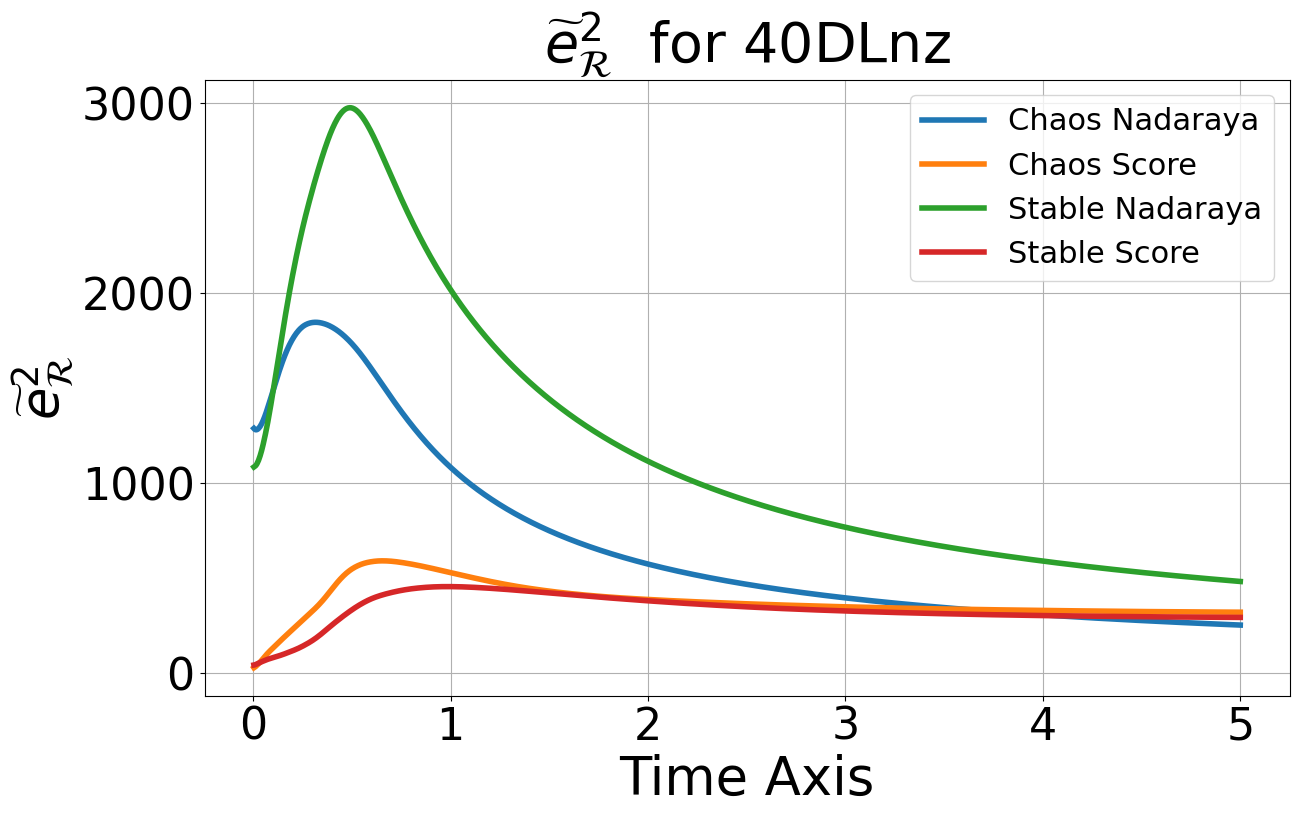

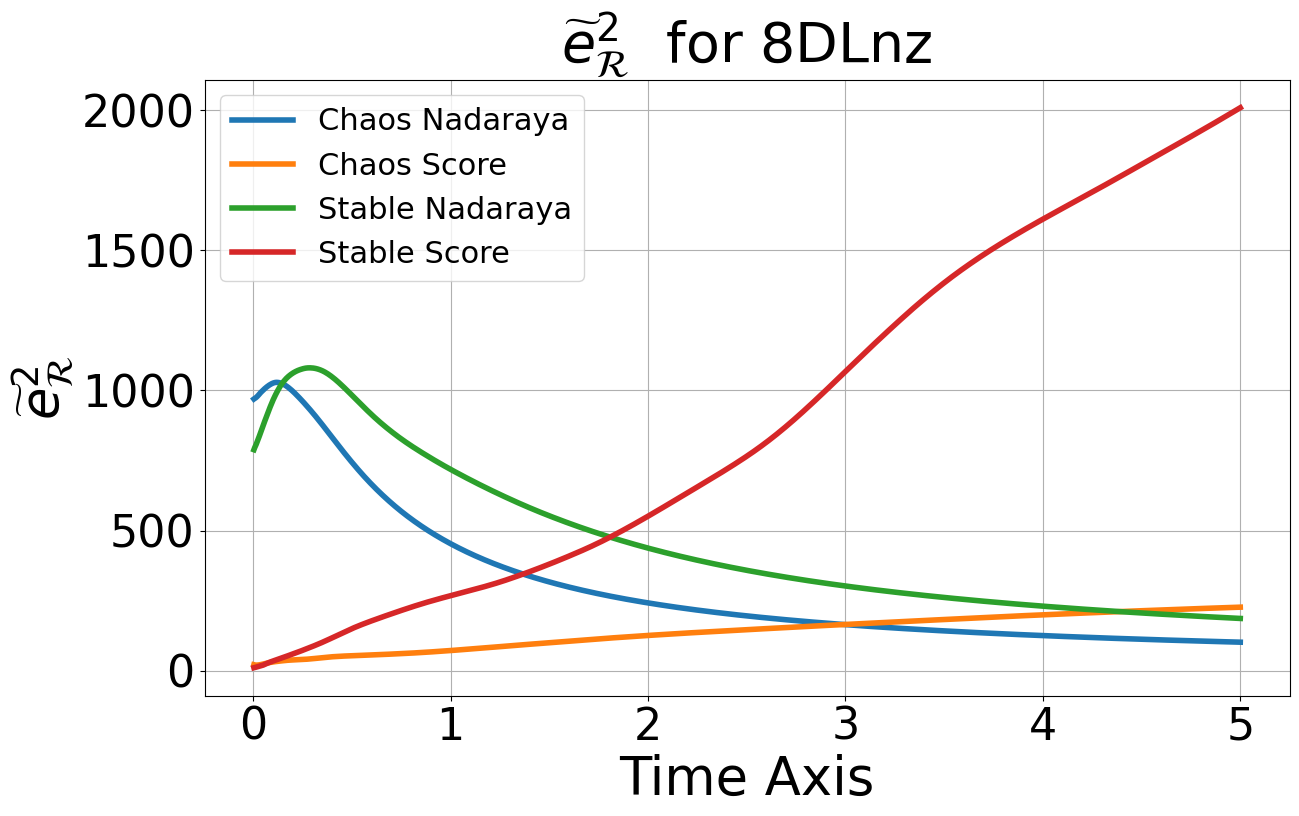

In [62]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$\widetilde{{e}}^{{2}}_{{\mathcal{{R}}}}$  for {alt_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$\widetilde{{e}}^{{2}}_{{\mathcal{{R}}}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.grid(True)
    plt.show()
    plt.close()

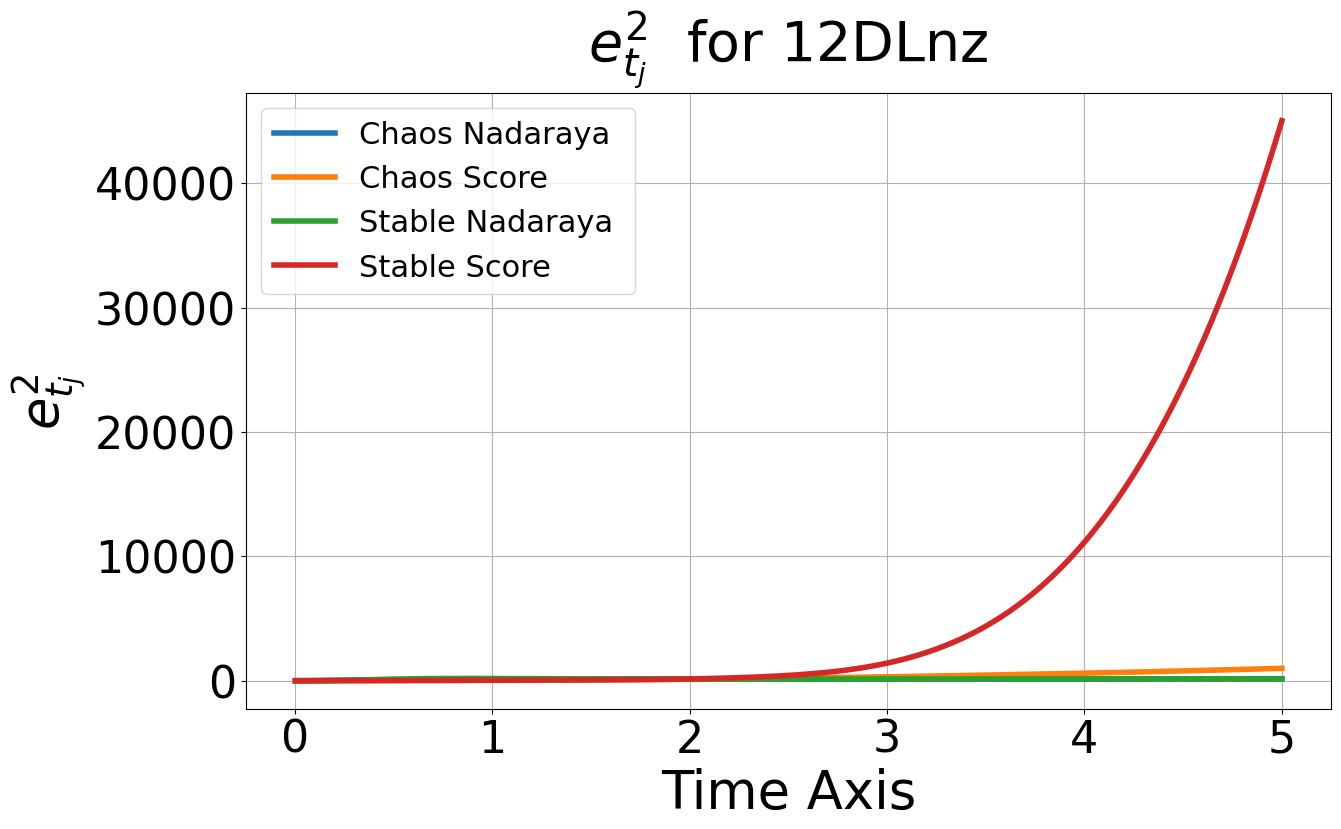

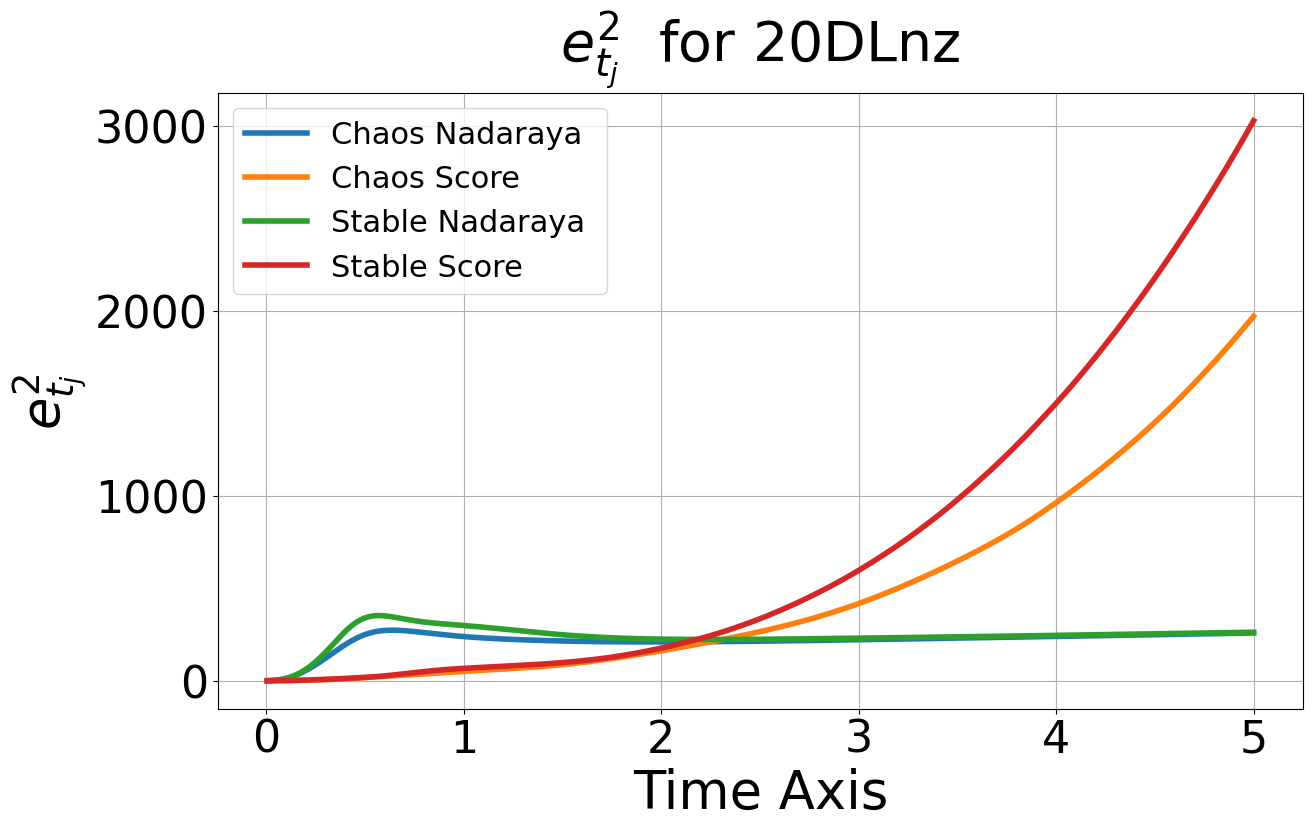

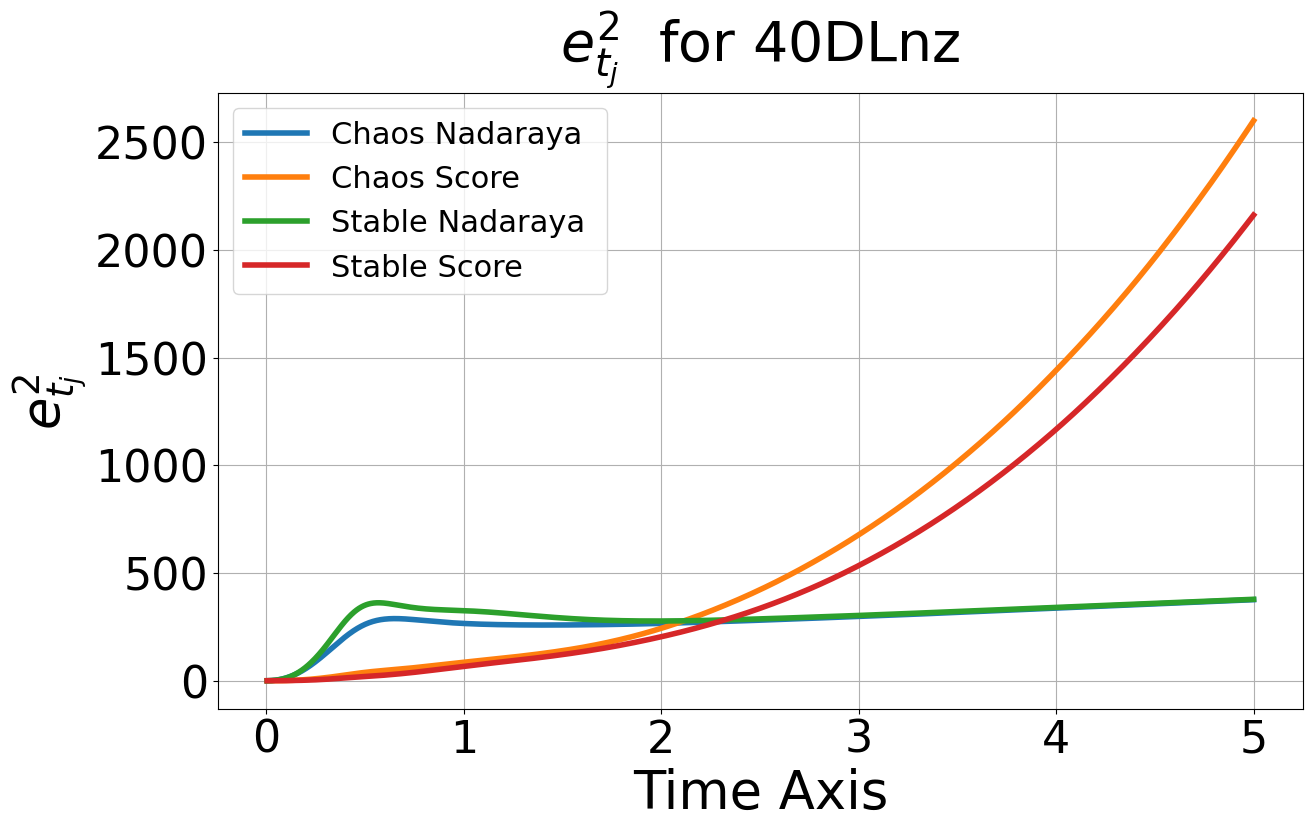

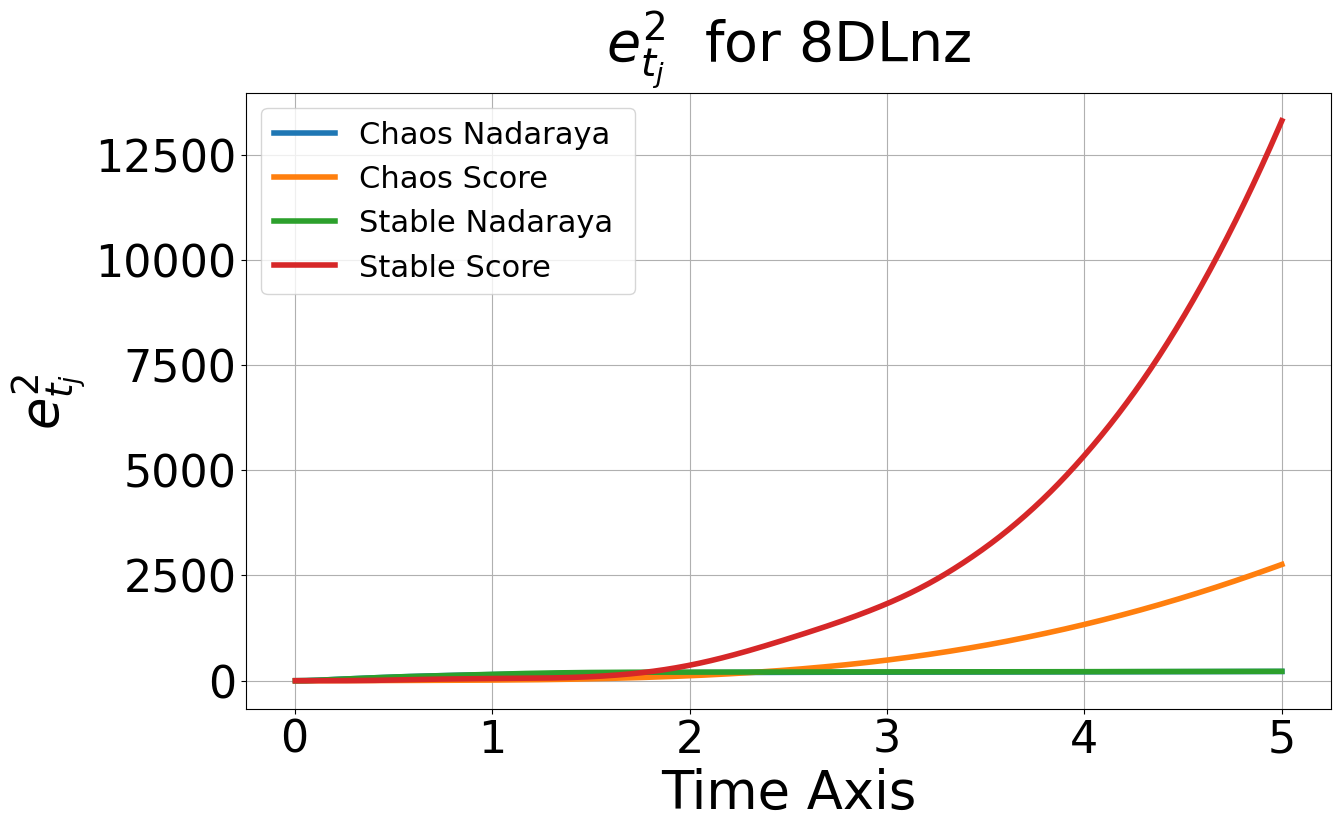

In [63]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = state_eval.iloc[:, k:k+4]**2
    currevals.rename({d:d.split("DLnz")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$e^{{2}}_{{t_j}}$  for {state_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$e^{{2}}_{{t_j}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.grid(True)
    plt.show()
    plt.close()

In [64]:
state_eval

,12DLnzChaos Nadaraya State,12DLnzChaos Score State,12DLnzStable Nadaraya State,12DLnzStable Score State,20DLnzChaos Nadaraya State,20DLnzChaos Score State,20DLnzStable Nadaraya State,20DLnzStable Score State,40DLnzChaos Nadaraya State,40DLnzChaos Score State,40DLnzStable Nadaraya State,40DLnzStable Score State,8DLnzChaos Nadaraya State,8DLnzChaos Score State,8DLnzStable Nadaraya State,8DLnzStable Score State
0.003906,0.105057,0.022424,0.096650,0.008857,0.138337,0.020457,0.128048,0.035232,0.140859,0.017749,0.128790,0.025313,0.121400,0.018702,0.108920,0.011691
0.007812,0.210127,0.045304,0.193688,0.018176,0.276110,0.039913,0.256109,0.071792,0.280877,0.036588,0.257259,0.049729,0.242858,0.036124,0.218416,0.023524
0.011719,0.315227,0.067289,0.291062,0.028163,0.413486,0.058950,0.384268,0.102763,0.420151,0.055921,0.385740,0.073897,0.364361,0.052369,0.328677,0.035725
0.015625,0.420269,0.088720,0.388860,0.038904,0.550665,0.078581,0.512704,0.129832,0.558915,0.076799,0.514240,0.098540,0.485728,0.067877,0.439359,0.048441
0.019531,0.525102,0.109916,0.487137,0.050599,0.687778,0.099487,0.641599,0.153958,0.697405,0.099532,0.643020,0.123814,0.607105,0.083011,0.550583,0.061746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.984375,12.672551,31.451957,12.673294,210.240087,16.066142,44.180163,16.195263,54.774232,19.377695,50.768684,19.424291,46.286596,14.831018,52.303556,14.917754,114.610199
4.988281,12.674505,31.479615,12.675139,210.727832,16.068605,44.237517,16.197237,54.841776,19.381649,50.821772,19.428186,46.336821,14.832217,52.367218,14.918789,114.794073
4.992188,12.676469,31.507306,12.676987,211.216208,16.071068,44.294834,16.199172,54.910690,19.385611,50.874869,19.432073,46.386957,14.833429,52.430930,14.919823,114.978156
4.996094,12.678423,31.534969,12.678831,211.705202,16.073526,44.352291,16.201109,54.978540,19.389570,50.927934,19.435953,46.437113,14.834640,52.494671,14.920860,115.162304
